**Morphological Operation in Threshold Segmentation**

Finanazwa Ayesha

24/532953/PA/22556

*Digital Image Processing 3rd Assignment*

## Importing library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image

## Upload image

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("File diupload:", filename)
img = Image.open(filename).convert("L")
image = np.array(img)
print("Ukuran gambar:", image.shape)

Saving _.jpeg to _ (1).jpeg
File diupload: _ (1).jpeg
Ukuran gambar: (1308, 736)


First, we upload an image from our computer, converts it to grayscale, and then transforms it into a NumPy array for further processing, also printing the filename and image dimensions.

## Threshold Segmentation

In [ ]:
def threshold_segmentation(img, thresh=100):
    h, w = img.shape
    result = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if img[i, j] >= thresh:
                result[i, j] = 1
            else:
                result[i, j] = 0
    return result

binary_img = threshold_segmentation(image, 100)

Here, we upload the image and convert it to grayscale. Then, we print the size of the image. After that, we perform threshold segmentation to create a binary image, where pixels are classified as either foreground or background based on a threshold value.

## Morphological Operations

In [ ]:
#Structuring Elements
se = [[1,1,1],
      [1,1,1],
      [1,1,1]]

#Add Padding
def pad_image(img, pad=1):
    h, w = img.shape
    padded = np.zeros((h+2*pad, w+2*pad))
    padded[pad:pad+h, pad:pad+w] = img
    return padded



1.   se = [[1,1,1],[1,1,1],[1,1,1]]: This line defines a variable which represents a 3x3 structuring element (matrix)that used for our morphological operation.
2.   We define the padding using the function called pad_image. Because morphological operation usually will use padding so this would make the operation handle the image easier. The dimension would be larger, and the new array made would be filled with zeros as a black border around the original image The default value of the padding (pad=1) is 1 so it would add a 1-pixel border.

### Erosion

In [ ]:
def erosion(img, se):
    h, w = img.shape
    padded = pad_image(img)
    result = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            if np.all(region[se==1] == 1):
                result[i,j] = 1
    return result

So we have 2 arguments: img (the input binary image as a NumPy array) and se (the structuring element). First, the height (h) and width (w) of the image are obtained using img.shape. The image is then padded using the pad_image(img) function so that the structuring element can slide properly over the edges of the image. A new array named result is created with the same dimensions as the original image to store the erosion output. The function then iterates over each pixel in the image using nested loops. For every pixel position (i, j), a 3×3 region from the padded image is extracted (region = padded[i:i+3, j:j+3]), representing the neighborhood around that pixel. The condition if np.all(region[se==1] == 1) checks whether all pixels in the region that correspond to the foreground positions (1s) in the structuring element are also foreground pixels in the image. If this condition is true, the corresponding pixel (i, j) in the result image is set to 1 (result[i, j] = 1). After all pixels have been processed, the function returns result, which represents the erosion version of the input binary image.

### Dilation

In [ ]:
def dilation(img, se):
    h, w = img.shape
    padded = pad_image(img)
    result = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            if np.any(region[se==1] == 1):
                result[i,j] = 1
    return result

For dilation, in every pixel (i, j), a 3×3 neighborhood region is extracted from the padded image (region = padded[i:i+3, j:j+3]). The key step is the condition if np.any(region[se==1] == 1):, which checks if any of the pixels in the region that correspond to the foreground pixels (1s) in the structuring element are equal to 1. If at least one such pixel is 1, the corresponding output pixel (i, j) in the result image is set to 1. Finally, the function returns the result, which is the dilated version of the input image.

The difference is that in erosion, a pizel is set to 1 only if ALL corresponding pixels are 1 (np.all), it would make the objects shrink. Meanwhile, in dilation a pizel i set to 1 if ANY corresponding pixel under the se is 1 (np.any), it would make the objects grow or expand.

### Opening

In [ ]:
def opening(img, se):
    return dilation(erosion(img, se), se)

The opening function performs dilation(erosion(img, se), se). It first erodes the image to remove small noise and thin connections, then dilates it to restore the main object shape. Opening is mainly used to clean up small foreground noise and smooth object boundaries.

### Closing

In [ ]:
def closing(img, se):
    return erosion(dilation(img, se), se)

The closing function performs erosion(dilation(img, se), se). It first dilates the image to fill small holes or gaps, then erodes it to return the object to its original size. Closing is useful for closing small gaps and connecting nearby objects.

## Apply morphological processing

In [ ]:
opened_img = opening(binary_img, np.array(se))
closed_img = closing(binary_img, np.array(se))

## Visualization

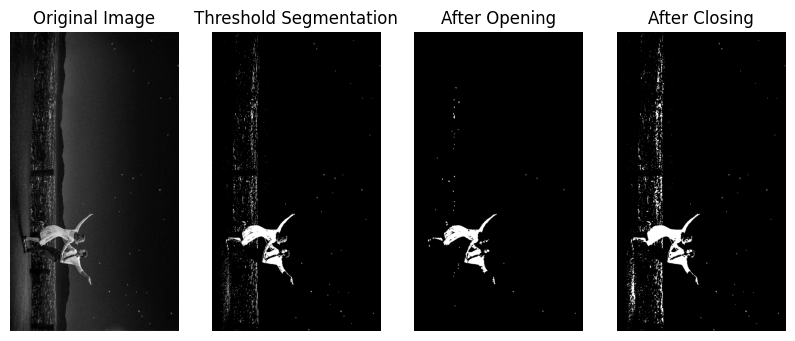

In [ ]:
titles = ['Original Image', 'Threshold Segmentation', 'After Opening', 'After Closing']
images = [image, binary_img, opened_img, closed_img]


plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

1.   **Original Image**: The first image is the grayscale input image before any processing. It contains both the main object and background details such as noise and lighting variations.
2.   **Threshold Segmentation:** The second image shows the result after applying thresholding, which converts the grayscale image into a binary image (black and white). The white regions represent the detected objects (foreground), while black represents the background. Some noise and unwanted small spots are still visible.
3.   **After Opening**: The third image shows the result after applying the opening operation. This process removes small white noise and thin connections, cleaning up the segmented image so that only the main object remains more clearly defined. But it reducing the size of the foreground object.
4.   **After Closing:** The fourth image shows the result after applying the closing operation. This operation fills small black holes or gaps within the foreground region and connects nearby white areas, it made the main object appear more complete and solid.



